In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud as wc
import string
import re

from nltk import TreebankWordTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
# Assuming your dataset is named 'df'
df = pd.read_csv('Nazario_5 + Nigerian_5 DATA SET FOR THESIS.csv')

In [5]:
df.head()

,sender,receiver,date,subject,body,label,urls
0,"""Hu, Sylvia"" <Sylvia.Hu@ENRON.com>","""Acevedo, Felecia"" <Felecia.Acevedo@ENRON.com>...","Fri, 29 Jun 2001 08:36:09 -0500","FW: June 29 -- BNA, Inc. Daily Labor Report",User ID: enrondlr\nPW: bnaweb22\n-----Original...,0,"['http://web.bna.com', 'http://pubs.bna.com/ip..."
1,"""Webb, Jay"" <Jay.Webb@ENRON.com>","""Lambie, Chris"" <Chris.Lambie@ENRON.com>","Fri, 29 Jun 2001 09:37:04 -0500",NGX failover plan.,"Hi Chris, Tonight we are rolling out a new rep...",0,[]
2,"""Symms, Mark"" <Mark.Symms@ENRON.com>","""Thomas, Paul D."" <Paul.D.Thomas@ENRON.com>","Fri, 29 Jun 2001 08:39:30 -0500",RE: Intranet Site,Rika r these new?\n-----Original Message-----\...,0,['http://eastpower.dev.corp.enron.com/summary/...
3,"""Thorne, Judy"" <Judy.Thorne@ENRON.com>","""Grass, John"" <John.Grass@ENRON.com>, ""Nemec, ...","Fri, 29 Jun 2001 10:35:17 -0500",FW: ENA Upstream Company information,"John/Gerald,\nWe are currently trading under G...",0,[]
4,"""Williams, Jason R (Credit)"" <Jason.R.Williams...","""Nemec, Gerald"" <Gerald.Nemec@ENRON.com>, ""Dic...","Fri, 29 Jun 2001 10:40:02 -0500",New Master Physical,Gerald and Stacy -\nAttached is a worksheet fo...,0,[]


In [6]:
columns_to_drop = ['sender', 'receiver','date']
df = df.drop(columns=columns_to_drop, axis=1)
df.head()

,subject,body,label,urls
0,"FW: June 29 -- BNA, Inc. Daily Labor Report",User ID: enrondlr\nPW: bnaweb22\n-----Original...,0,"['http://web.bna.com', 'http://pubs.bna.com/ip..."
1,NGX failover plan.,"Hi Chris, Tonight we are rolling out a new rep...",0,[]
2,RE: Intranet Site,Rika r these new?\n-----Original Message-----\...,0,['http://eastpower.dev.corp.enron.com/summary/...
3,FW: ENA Upstream Company information,"John/Gerald,\nWe are currently trading under G...",0,[]
4,New Master Physical,Gerald and Stacy -\nAttached is a worksheet fo...,0,[]


In [7]:
df.isnull().sum()

subject     1
body       13
label       0
urls        0
dtype: int64

In [8]:
df.describe()

,label
count,5714.000000
mean,0.621106
std,0.485154
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [10]:
df.dropna(inplace=True)

In [11]:
df.isnull().sum()

subject    0
body       0
label      0
urls       0
dtype: int64

In [12]:
df['label'].value_counts()

1    3545
0    2155
Name: label, dtype: int64

In [13]:

# Assuming 'df' is your DataFrame
df['combined_text'] = df['subject'].fillna('') + ' ' + df['body'].fillna('')

# Text preprocessing: remove non-alphanumeric characters, convert to lowercase
df['combined_text'] = df['combined_text'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x.lower()))

# Tokenization, stemming, and removing stop words
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
df['combined_text'] = df['combined_text'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split() if word not in stop_words]))

# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(df['combined_text'])

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df['label'], test_size=0.2, random_state=42)

# Choosing a model
model = MultinomialNB()

# Training the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9850877192982456
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       443
           1       0.98      0.99      0.99       697

    accuracy                           0.99      1140
   macro avg       0.99      0.98      0.98      1140
weighted avg       0.99      0.99      0.99      1140

Confusion Matrix:
 [[431  12]
 [  5 692]]


In [14]:
from sklearn.model_selection import cross_val_score

# Assuming your model is named 'model'
cv_scores = cross_val_score(model, X_tfidf, df['label'], cv=5)  # 5-fold cross-validation

print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))


Cross-Validation Scores: [0.94649123 0.96315789 0.97192982 0.98421053 0.99035088]
Mean CV Score: 0.9712280701754386


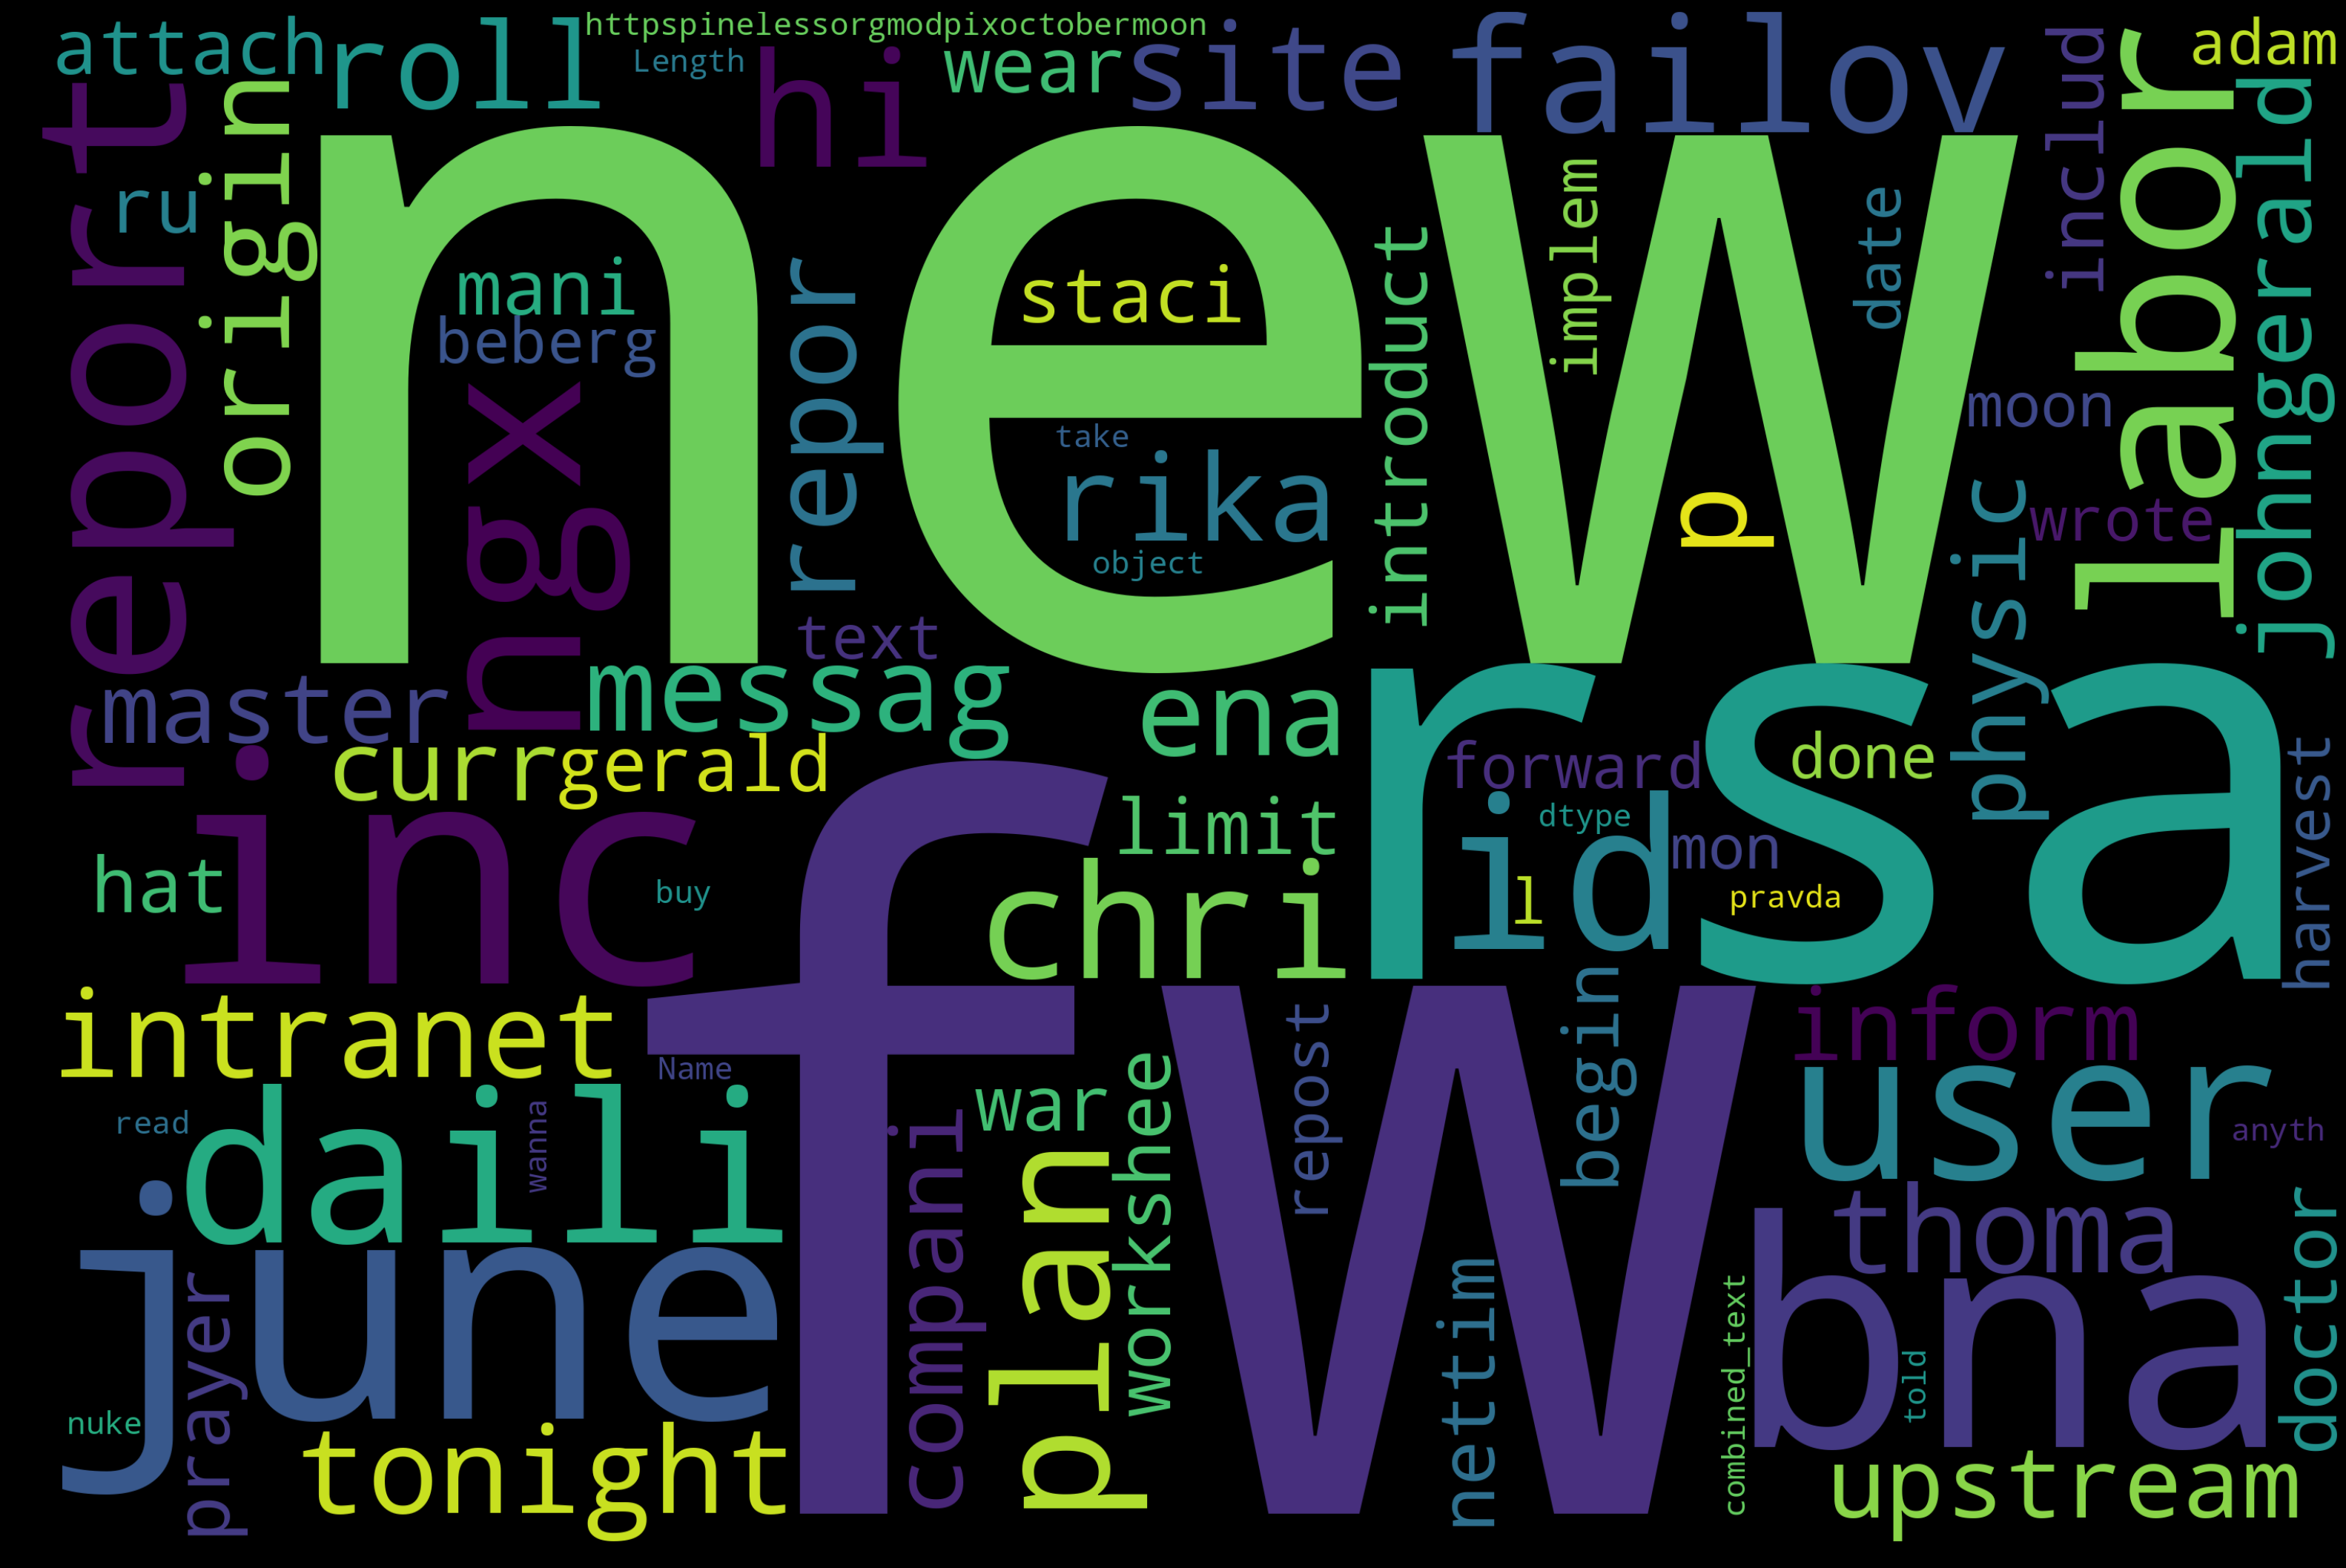

In [15]:
text = df["combined_text"]

wordcloud = wc.WordCloud(
    width = 3000,
    height = 2000,
    stopwords = wc.STOPWORDS).generate(str(text))

fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')

In [16]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the Random Forest model
rf_model.fit(X_train, y_train)

# Making predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluating Random Forest model performance
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Accuracy: 0.9824561403508771
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.98       443
           1       0.98      0.99      0.99       697

    accuracy                           0.98      1140
   macro avg       0.98      0.98      0.98      1140
weighted avg       0.98      0.98      0.98      1140

Confusion Matrix:
 [[427  16]
 [  4 693]]
